# Importing the libraries

In [31]:
! pip install sweetviz -q

In [32]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.model_selection import train_test_split
from scipy.stats import zscore
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings("ignore")



# Loading the Dataset

### We have loaded both "train" and "test" dataset

In [33]:
#load the dataset
df_train = pd.read_csv("D:/bigdatamart_Train.csv")
df_test = pd.read_csv("D:/bigdatamart_Test.csv")

# Further throughout the analysis

## "df_train" is "Training Dataset"
## "df_test" is "Test Dataset"

In [34]:
df_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [35]:
df_test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


# Preporcessing


### The "Train Dataset" has 8523 rows and 12 columns that includes the target variable "Item_Outlet_Sales"

### The "Test Dataset" has 5681 rows and 11 columns that does not include the target variable

In [36]:
print("Train Data:", df_train.shape)
print("Test Data:", df_test.shape)

Train Data: (8523, 12)
Test Data: (5681, 11)


# We will use "Sweetviz" to analyze "Train" dataset

##### [Note: this library doesn't work in google colab, it works in Jupyter notebook ]

In [ ]:
import sweetviz

my_report = sweetviz.analyze([df_train, "Train Dataset"], target_feat="Item_Outlet_Sales")

                                             |          | [  0%]   00:00 -> (? left)

In [ ]:
my_report.show_html("Comparison.html")

Report Comparison.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


# The stats for "Train Dataset"

### We can notice a couple of missing values in the dataset for columns "Item_Weight" and "Outlet_Size"

In [37]:
df_train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


## From info we get to know that:

###In "Train Dataset", the columns "Item_Weight" has 1463 missing values and "Outlet_Size" and has 2410 missing values

In [38]:
df_train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

## From info we get to know that:

###In "Test Dataset", the columns "Item_Weight" has 976 missing values and "Outlet_Size" and has 1606 missing values

In [39]:
df_test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

### Plot to compare the outlet establishment year

#### It appears majority of the shops / outlets were started in the year 1985 and 1998 was the year with very less number of stores

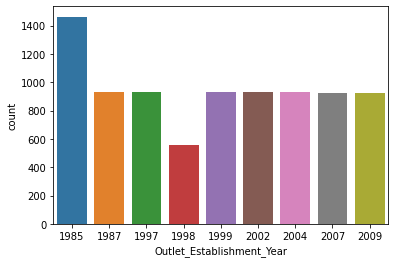

In [40]:

sns.countplot("Outlet_Establishment_Year", data=df_train)

In [41]:
df_train["Outlet_Type"].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

# Fill the missing values for both "Traning" and "Test" dataset

In [42]:
# Fill the columns with mean as its continous data

df_train["Item_Weight"].fillna(df_train["Item_Weight"].mean(), inplace=True)

In [43]:
# Fill the columns with mean as its continous data

df_test["Item_Weight"].fillna(df_test["Item_Weight"].mean(), inplace=True)

In [44]:
df_train["Outlet_Size"].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [45]:
# Fill the columns with mode as its categorical data

df_train["Outlet_Size"].fillna(df_train["Outlet_Size"].value_counts().index[0], inplace=True)


In [46]:
df_test["Outlet_Size"].value_counts()

Medium    1862
Small     1592
High       621
Name: Outlet_Size, dtype: int64

In [47]:
# Fill the columns with mode as its categorical data

df_test["Outlet_Size"].fillna(df_test["Outlet_Size"].value_counts().index[0], inplace=True)

# Let's check if we still have Null values

### Null values have been removed, for both "Train" and "Test" dataset

In [48]:
df_train.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [49]:
df_test.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

# Let's check the same output using a Heatmap for both "Train" and "Test" dataset

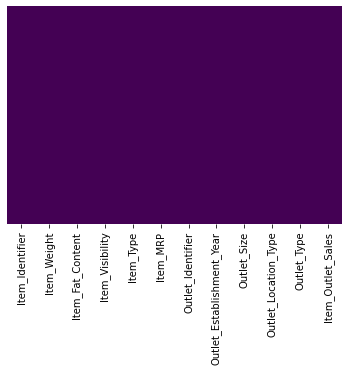

In [50]:
# train data set

sns.heatmap(df_train.isnull(), yticklabels=False, cbar=False, cmap="viridis")

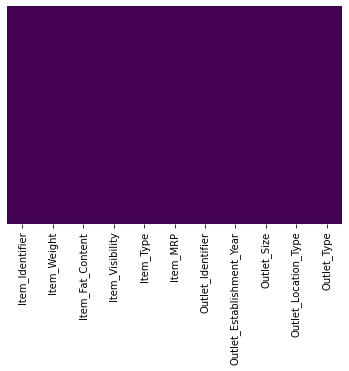

In [51]:
# test data set

sns.heatmap(df_test.isnull(), yticklabels=False, cbar=False, cmap="viridis")


#### Displaying the total columns names to select features for encoding

In [52]:
df_train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

# Encoding the dataset

### I have used LabelEncoder to encode the columns "Item_Identifier", "Item_Fat_Content", "Item_Type", "Outlet_Identifier", "Outlet_Size", "Outlet_Location_Type" and "Outlet_Type"

In [53]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

# Encode the training dataset

df_train.Item_Identifier = encoder.fit_transform(df_train.Item_Identifier)
df_train.Item_Fat_Content = encoder.fit_transform(df_train.Item_Fat_Content)
df_train.Item_Type = encoder.fit_transform(df_train.Item_Type)
df_train.Outlet_Identifier = encoder.fit_transform(df_train.Outlet_Identifier)
df_train.Outlet_Size = encoder.fit_transform(df_train.Outlet_Size)
df_train.Outlet_Location_Type = encoder.fit_transform(df_train.Outlet_Location_Type)
df_train.Outlet_Type = encoder.fit_transform(df_train.Outlet_Type)


# Encode the test dataset

df_test.Item_Identifier = encoder.fit_transform(df_test.Item_Identifier)
df_test.Item_Fat_Content = encoder.fit_transform(df_test.Item_Fat_Content)
df_test.Item_Type = encoder.fit_transform(df_test.Item_Type)
df_test.Outlet_Identifier = encoder.fit_transform(df_test.Outlet_Identifier)
df_test.Outlet_Size = encoder.fit_transform(df_test.Outlet_Size)
df_test.Outlet_Location_Type = encoder.fit_transform(df_test.Outlet_Location_Type)
df_test.Outlet_Type = encoder.fit_transform(df_test.Outlet_Type)


# Datasets have now been encoded

In [54]:
df_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,1,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,2,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.50,1,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.20,2,0.000000,6,182.0950,0,1998,1,2,0,732.3800
4,1297,8.93,1,0.000000,9,53.8614,1,1987,0,2,1,994.7052


In [55]:
df_test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,1103,20.750000,1,0.007565,13,107.8622,9,1999,1,0,1
1,1067,8.300000,4,0.038428,4,87.3198,2,2007,1,1,1
2,1406,14.600000,1,0.099575,11,241.7538,0,1998,1,2,0
3,809,7.315000,1,0.015388,13,155.0340,2,2007,1,1,1
4,1184,12.695633,2,0.118599,4,234.2300,5,1985,1,2,3


# Let's now observe the stats of the dataset

### All the values are accounted for and has no missing values

#### Difference between mean and std also seems fine . However we will check for skewness if any in the further steps

In [56]:
df_train.describe()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,779.714889,12.857645,1.369354,0.066132,7.226681,140.992782,4.722281,1997.831867,1.170832,1.112871,1.201220,2181.288914
std,449.222377,4.226124,0.644810,0.051598,4.209990,62.275067,2.837201,8.371760,0.600327,0.812757,0.796459,1706.499616
min,0.000000,4.555000,0.000000,0.000000,0.000000,31.290000,0.000000,1985.000000,0.000000,0.000000,0.000000,33.290000
25%,395.500000,9.310000,1.000000,0.026989,4.000000,93.826500,2.000000,1987.000000,1.000000,0.000000,1.000000,834.247400
50%,783.000000,12.857645,1.000000,0.053931,6.000000,143.012800,5.000000,1999.000000,1.000000,1.000000,1.000000,1794.331000
75%,1167.000000,16.000000,2.000000,0.094585,10.000000,185.643700,7.000000,2004.000000,2.000000,2.000000,1.000000,3101.296400
max,1558.000000,21.350000,4.000000,0.328391,15.000000,266.888400,9.000000,2009.000000,2.000000,2.000000,3.000000,13086.964800


In [57]:
df_test.describe()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
count,5681.000000,5681.000000,5681.000000,5681.000000,5681.000000,5681.000000,5681.000000,5681.000000,5681.000000,5681.000000,5681.000000
mean,773.386376,12.695633,1.368773,0.065684,7.233410,141.023273,4.722760,1997.828903,1.170921,1.112832,1.201373
std,445.525926,4.245189,0.641085,0.051252,4.219057,61.809091,2.837201,8.372256,0.600328,0.812824,0.796740
min,0.000000,4.555000,0.000000,0.000000,0.000000,31.990000,0.000000,1985.000000,0.000000,0.000000,0.000000
25%,382.000000,9.195000,1.000000,0.027047,4.000000,94.412000,2.000000,1987.000000,1.000000,0.000000,1.000000
50%,771.000000,12.695633,1.000000,0.054154,6.000000,141.415400,5.000000,1999.000000,1.000000,1.000000,1.000000
75%,1160.000000,15.850000,2.000000,0.093463,10.000000,186.026600,7.000000,2004.000000,2.000000,2.000000,1.000000
max,1542.000000,21.350000,4.000000,0.323637,15.000000,266.588400,9.000000,2009.000000,2.000000,2.000000,3.000000


# Distribution of all the columns in the dataset


### All the features seem to be a little less normal distributed. So let us try to identify and remove outliers to check if the output can be imporved

### If are focussing on "Item_Weight", "Item_Visibility" and "Item_MRP" continuous columns for both "Training" and "Test" dataset

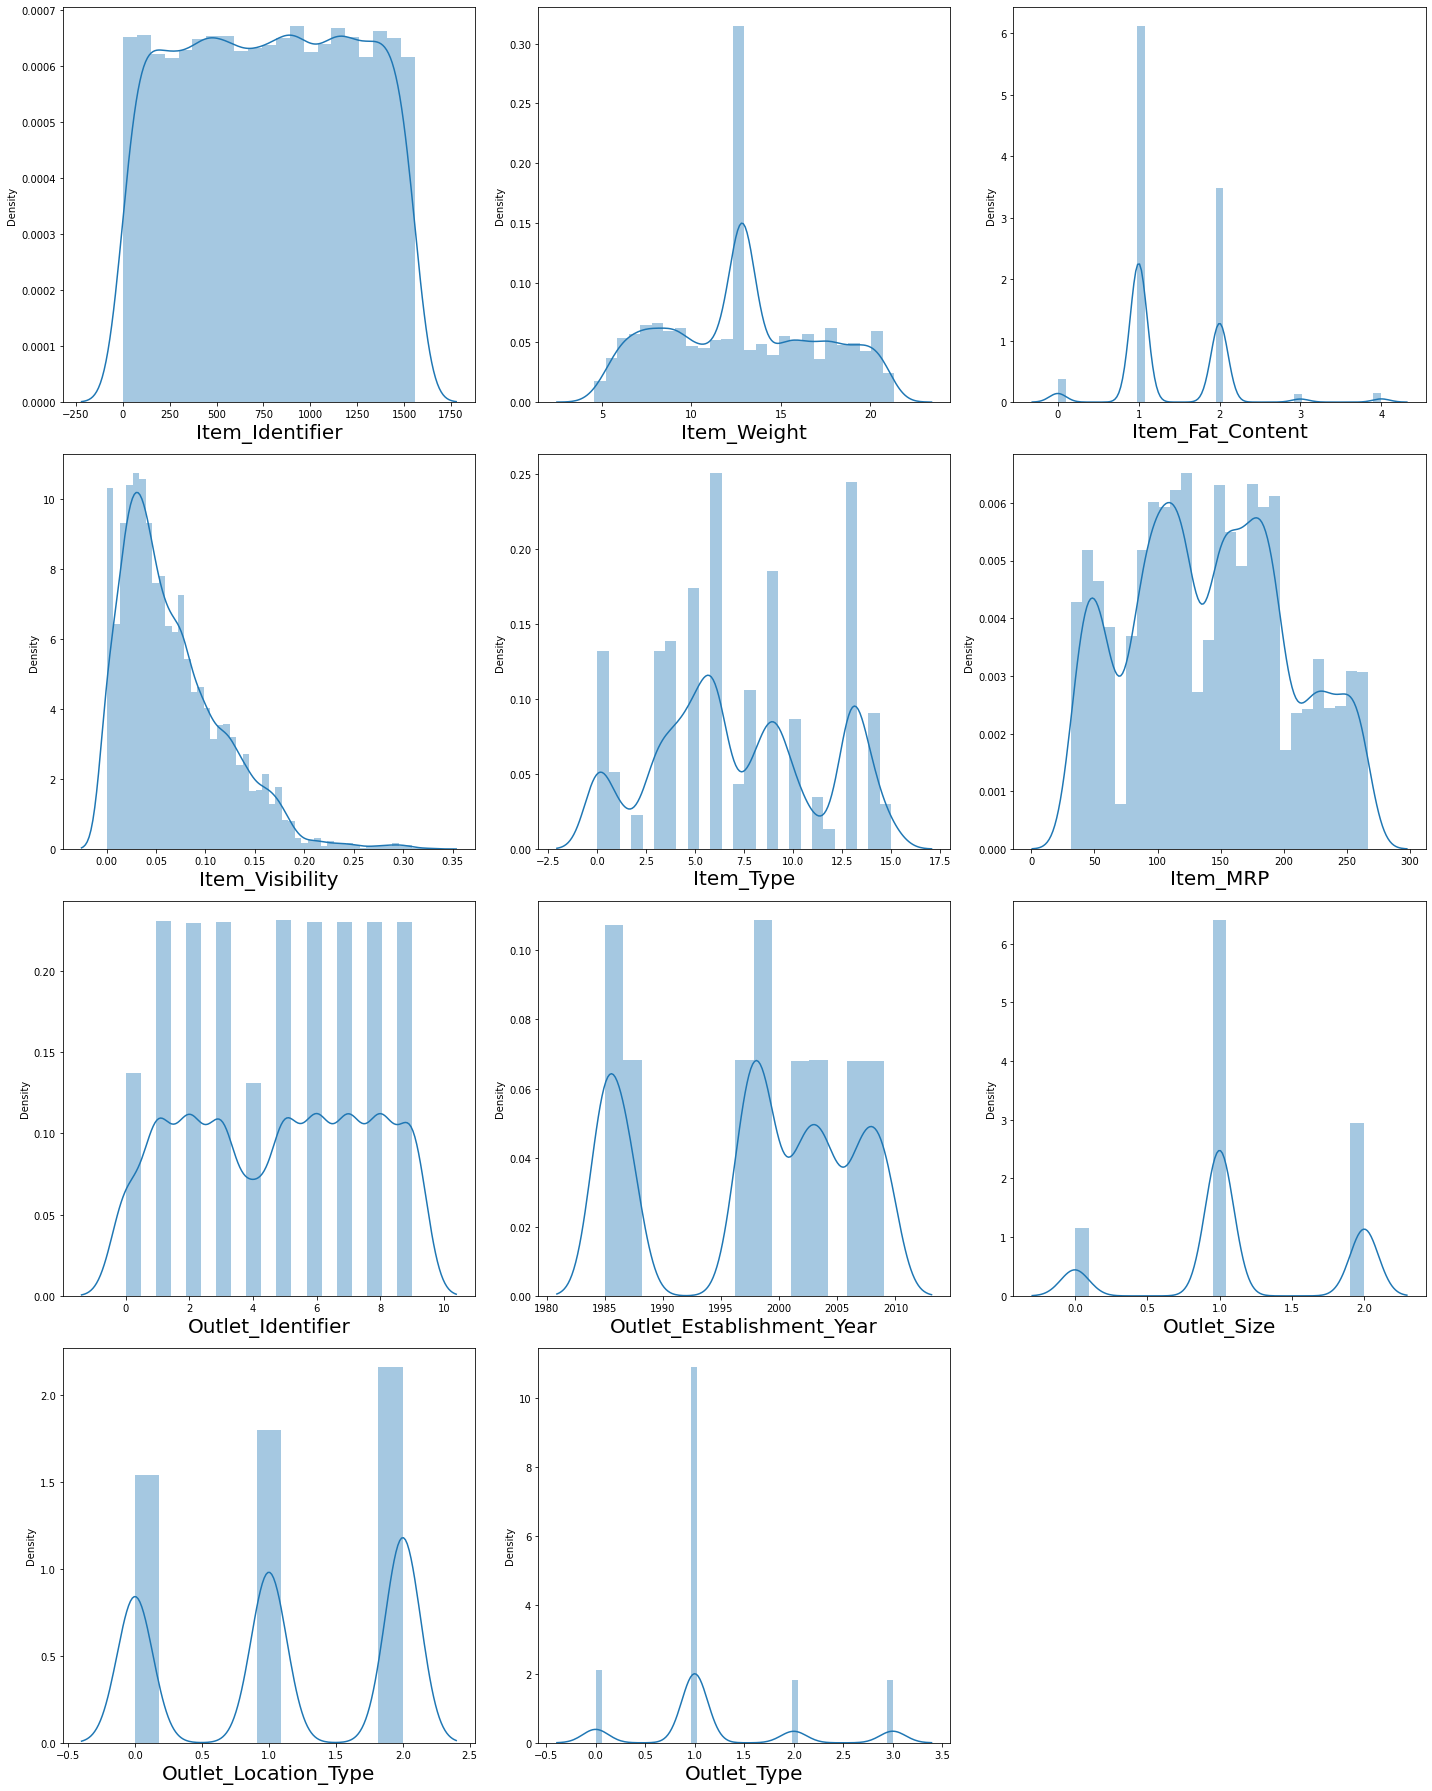

In [58]:
# let us now see the distribution of the "Train dataset"

plt.figure(figsize=(20,25), facecolor="white")
plotnumber = 1

for column in df_train:
    if plotnumber <=11:
        ax = plt.subplot(4,3, plotnumber)
        sns.distplot(df_train[column])
        plt.xlabel(column, fontsize=20)
    plotnumber+=1
plt.tight_layout()

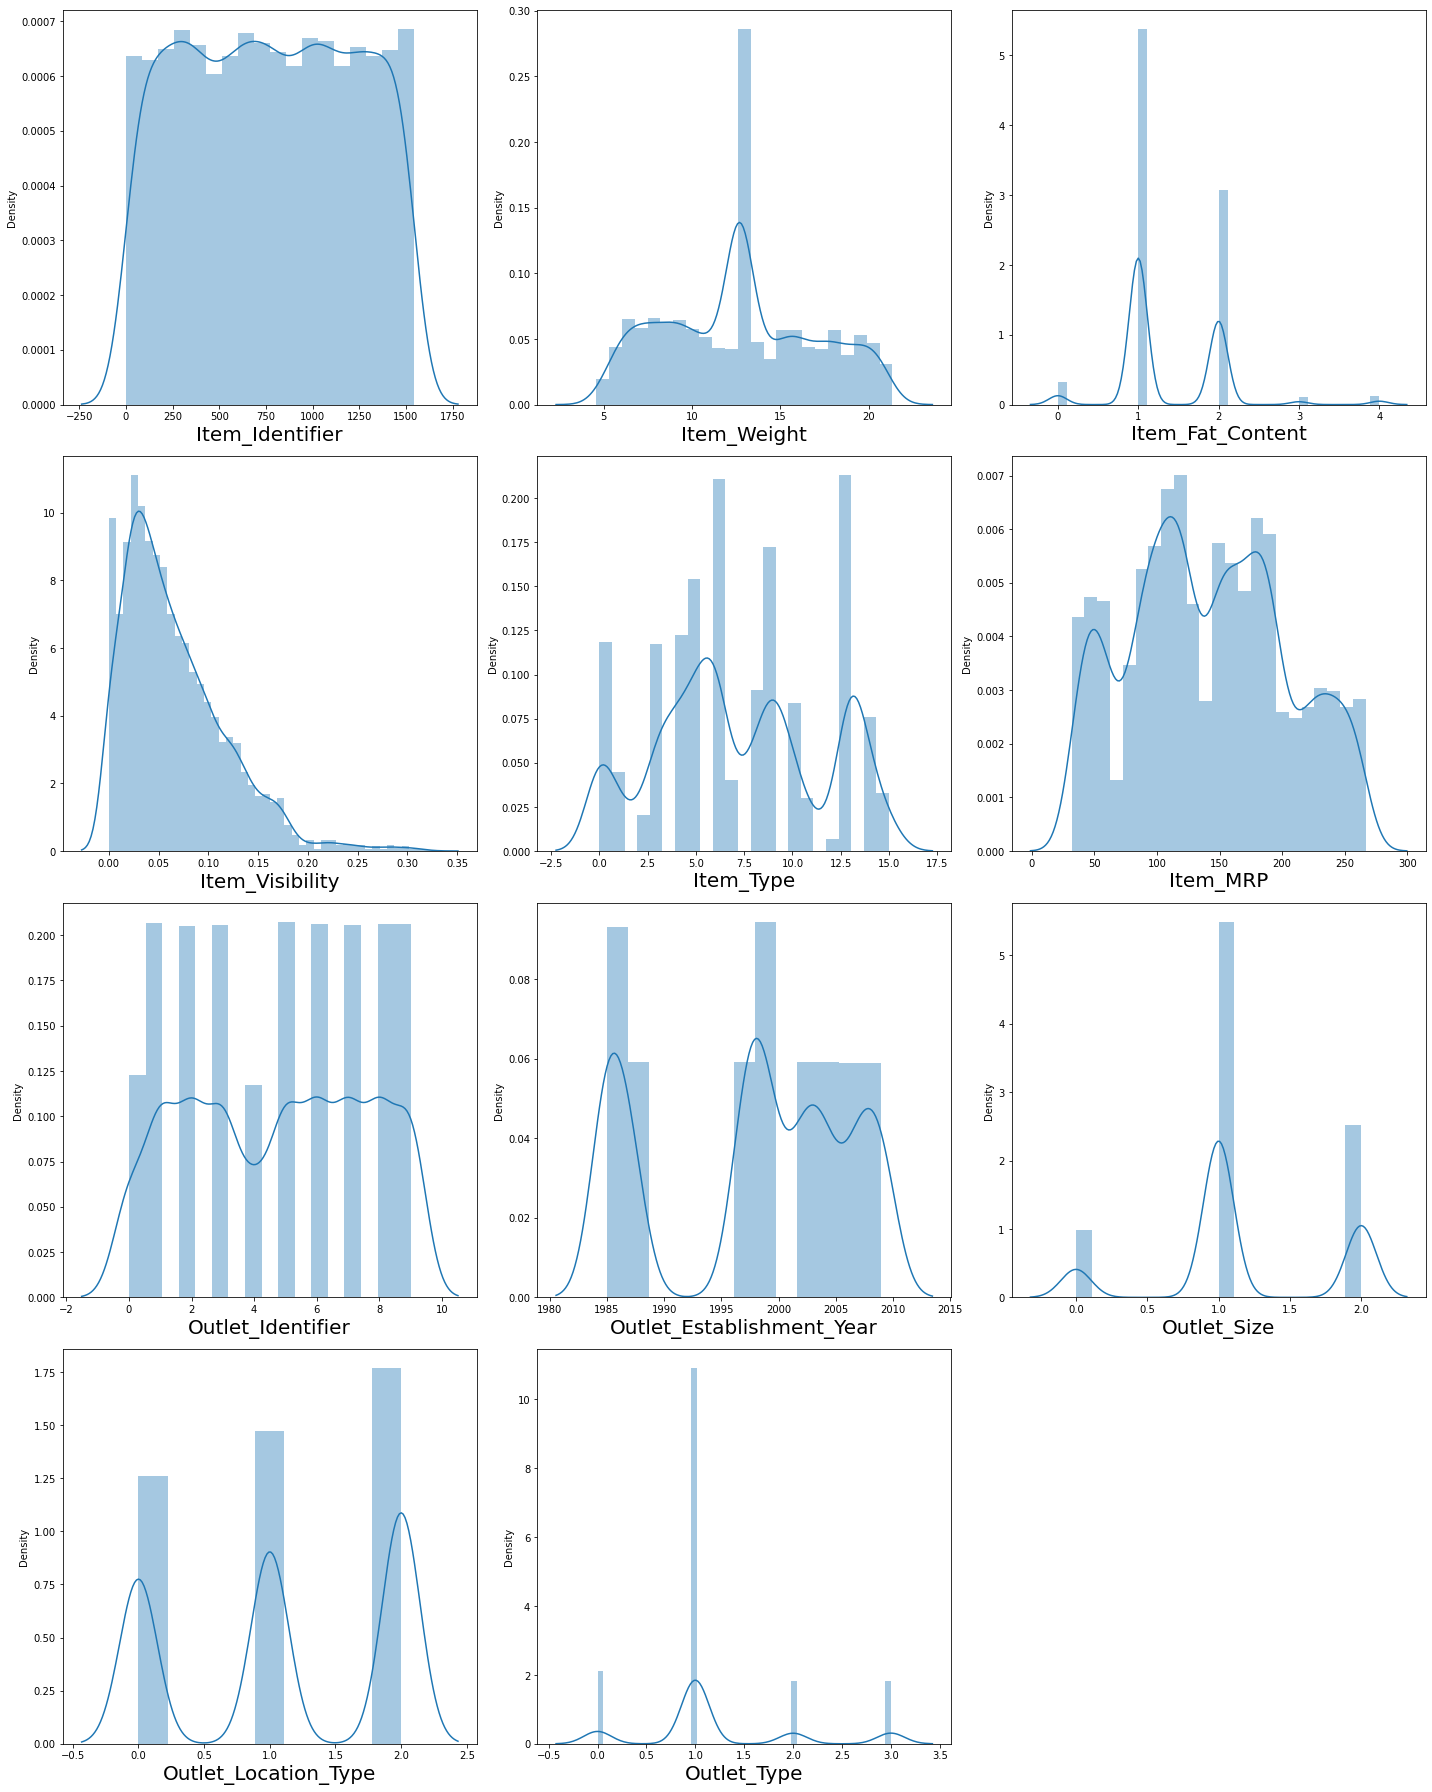

In [59]:
# let us now see the distribution of the "Test dataset"

plt.figure(figsize=(20,25), facecolor="white")
plotnumber = 1

for column in df_test:
    if plotnumber <=11:
        ax = plt.subplot(4,3, plotnumber)
        sns.distplot(df_test[column])
        plt.xlabel(column, fontsize=20)
    plotnumber+=1
plt.tight_layout()

# Applying Z-score to identify and remove outliers

### It appears the dataset has removed / reduced outliers to some extent for columns 'Item_Weight', 'Item_Visibility', and 'Item_MRP' for both "Train and "Test" dataset

### The stats show reduction of total values in the dataset to minimal extent only

In [60]:
from scipy.stats import zscore


# z_score on train dataset

z_score = zscore(df_train[['Item_Weight', 'Item_Visibility', 'Item_MRP']])
abs_zscore = np.abs(z_score)
filtering_entry = (abs_zscore < 3).all(axis=1)
df_train = df_train[filtering_entry]



# z_score on test dataset

z_score = zscore(df_test[['Item_Weight', 'Item_Visibility', 'Item_MRP']])
abs_zscore = np.abs(z_score)
filtering_entry = (abs_zscore < 3).all(axis=1)
df_test = df_test[filtering_entry]

# Lets observe the stats post outlier removal / reduction

In [61]:

df_train.describe()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
count,8428.000000,8428.000000,8428.000000,8428.000000,8428.000000,8428.000000,8428.000000,8428.000000,8428.000000,8428.000000,8428.00000,8428.000000
mean,779.993355,12.861218,1.369127,0.063905,7.227337,140.996015,4.750356,1997.911723,1.166469,1.115449,1.21476,2202.021401
std,449.735962,4.238141,0.644522,0.047302,4.207285,62.287713,2.832887,8.356697,0.599973,0.810126,0.79060,1704.631341
min,0.000000,4.555000,0.000000,0.000000,0.000000,31.290000,0.000000,1985.000000,0.000000,0.000000,0.00000,33.290000
25%,395.000000,9.300000,1.000000,0.026861,4.000000,93.802150,2.000000,1987.000000,1.000000,0.000000,1.00000,862.876800
50%,783.000000,12.857645,1.000000,0.053293,6.000000,142.915400,5.000000,1999.000000,1.000000,1.000000,1.00000,1816.968200
75%,1168.000000,16.100000,2.000000,0.093160,10.000000,185.708200,7.000000,2004.000000,2.000000,2.000000,1.00000,3115.944000
max,1558.000000,21.350000,4.000000,0.220226,15.000000,266.888400,9.000000,2009.000000,2.000000,2.000000,3.00000,13086.964800


In [62]:
df_test.describe()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
count,5600.000000,5600.000000,5600.000000,5600.000000,5600.000000,5600.000000,5600.000000,5600.000000,5600.000000,5600.000000,5600.000000
mean,774.142500,12.701017,1.366786,0.062899,7.240714,141.126934,4.760357,1997.926250,1.165714,1.115357,1.218750
std,446.008167,4.261717,0.638781,0.045919,4.223010,61.771211,2.830081,8.356738,0.600086,0.809556,0.789174
min,0.000000,4.555000,0.000000,0.000000,0.000000,31.990000,0.000000,1985.000000,0.000000,0.000000,0.000000
25%,383.000000,9.195000,1.000000,0.026848,4.000000,94.446200,2.000000,1987.000000,1.000000,0.000000,1.000000
50%,772.000000,12.695633,1.000000,0.053348,6.000000,141.531200,5.000000,1999.000000,1.000000,1.000000,1.000000
75%,1160.000000,15.850000,2.000000,0.091380,10.000000,186.098350,7.000000,2004.000000,2.000000,2.000000,1.000000
max,1542.000000,21.350000,4.000000,0.216763,15.000000,266.588400,9.000000,2009.000000,2.000000,2.000000,3.000000


### Percentage of Data Loss

#### It is told that if the data loss is more than 7 to 8%, we may not get accurate results. In this case less than 2% and not much of data is lost

In [63]:
# Percentage data loss for train dataset

loss_per_train = (8523-8428)/8523*100
print("Loss of Train data: ", loss_per_train)

# Percentage data loss for test dataset

loss_per_test = (5681-5600)/5681*100
print("Loss of Test data: ", loss_per_test)

Loss of Train data:  1.1146309984747156
Loss of Test data:  1.425805315965499


# Lets compare both "Train" and "Test" datasets at the same time

#### We will use "Sweetviz" to analyze both the datasets
#### [Note: this library doesn't work in google colab, it works in Jupyter notebook ]

In [ ]:
my_report1 =  sweetviz.compare([df_train, "Train Dataset"], [df_test, "Test Dataset"])

                                             |          | [  0%]   00:00 -> (? left)

In [ ]:
my_report1.show_html("Train_vs_Test.html")

Report Train_vs_Test.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


# Distribution of all the columns in the dataset (post z-score)

#### Ignoring the categorical values, the dataset is not perfectly normally distributed but its appears to be normally distributed than before.

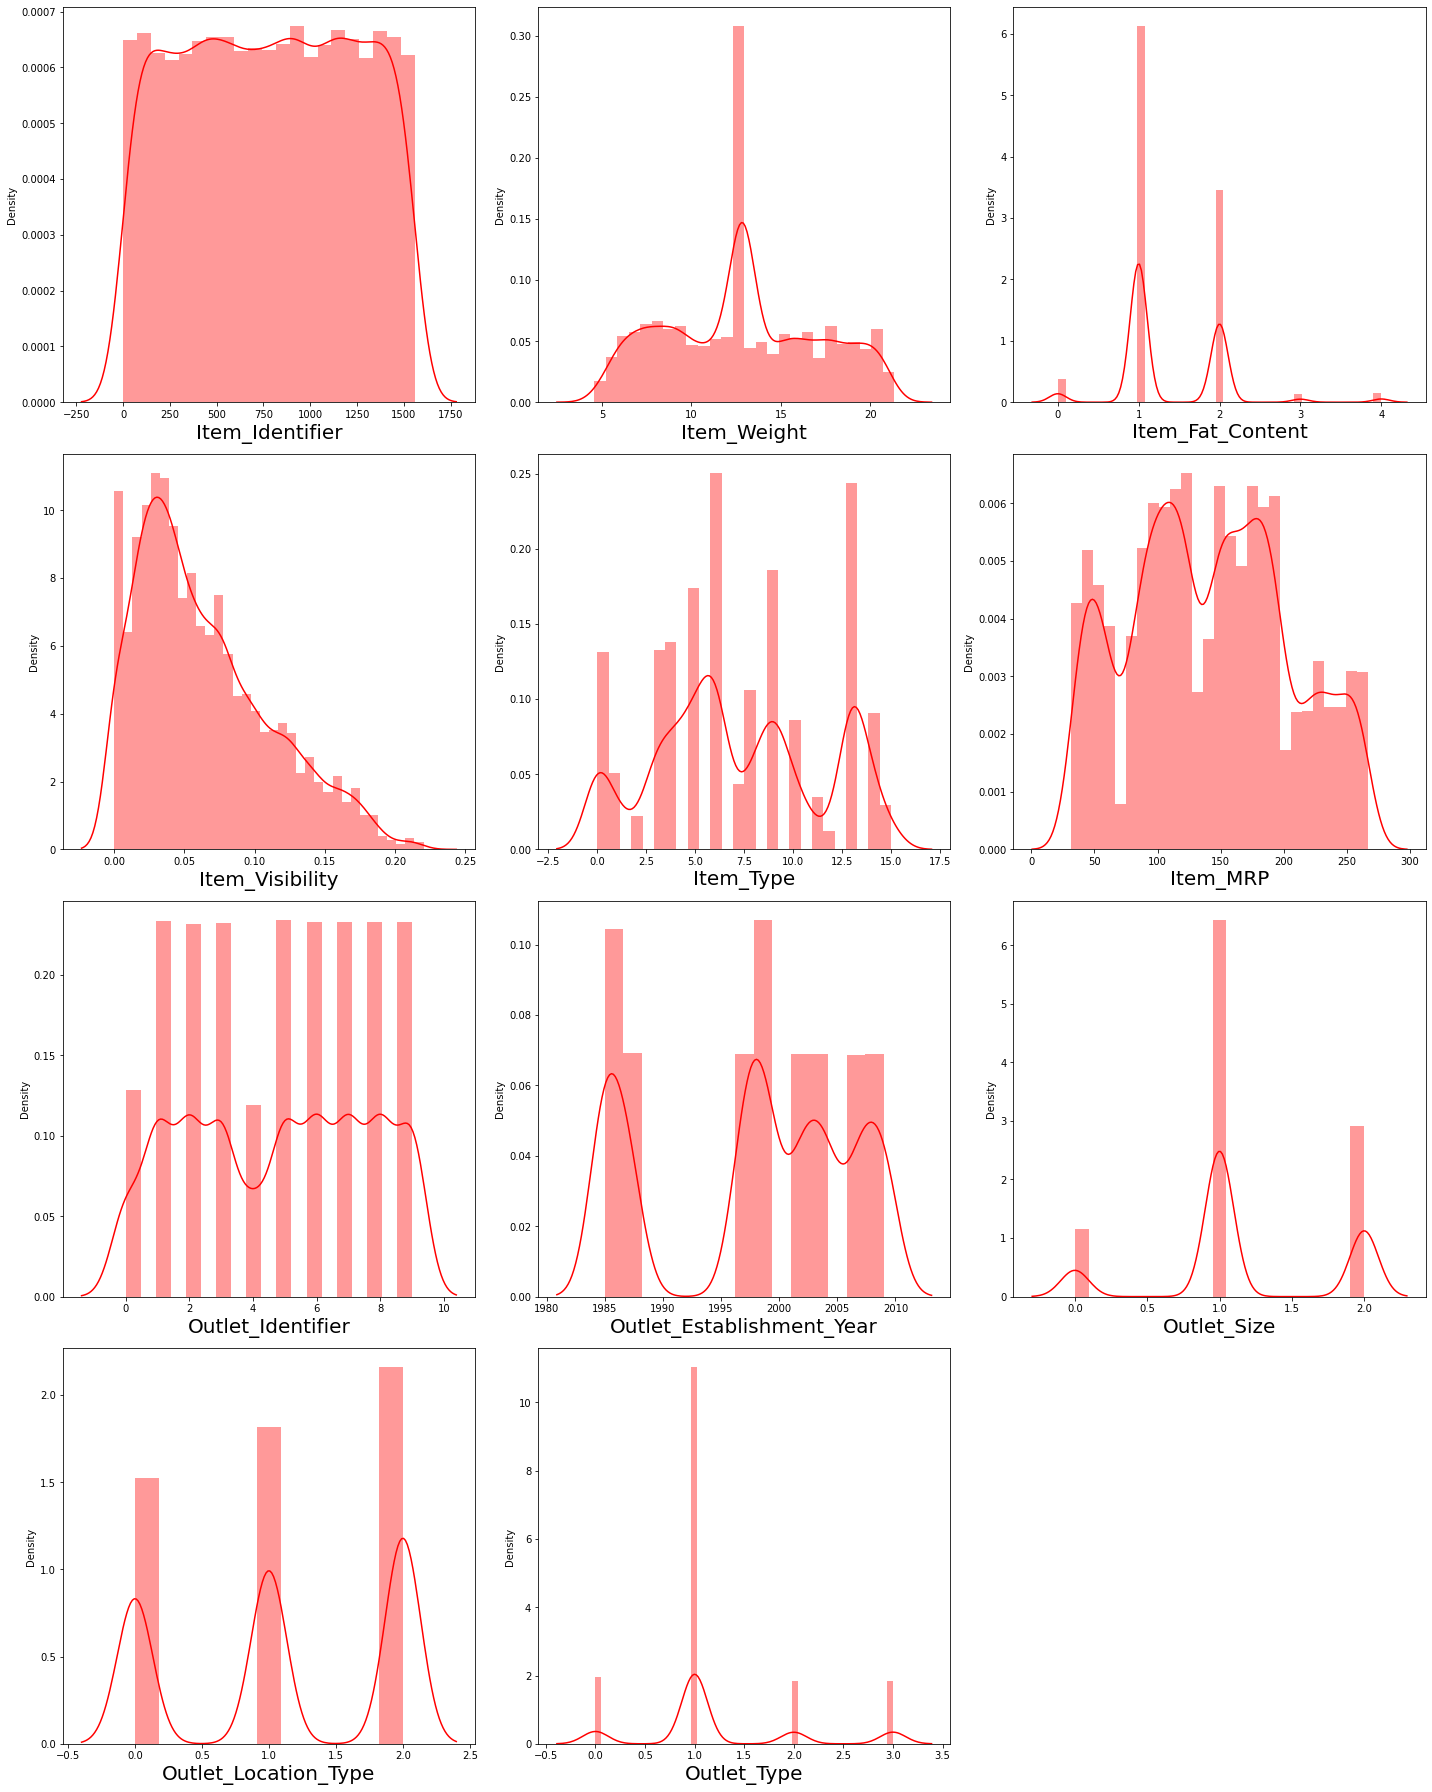

In [64]:
# let us now see the distribution of the dataset we have

plt.figure(figsize=(20,25), facecolor="white")
plotnumber = 1

for column in df_train:
    if plotnumber <=11:
        ax = plt.subplot(4,3, plotnumber)
        sns.distplot(df_train[column], color="red")
        plt.xlabel(column, fontsize=20)
    plotnumber+=1
plt.tight_layout()

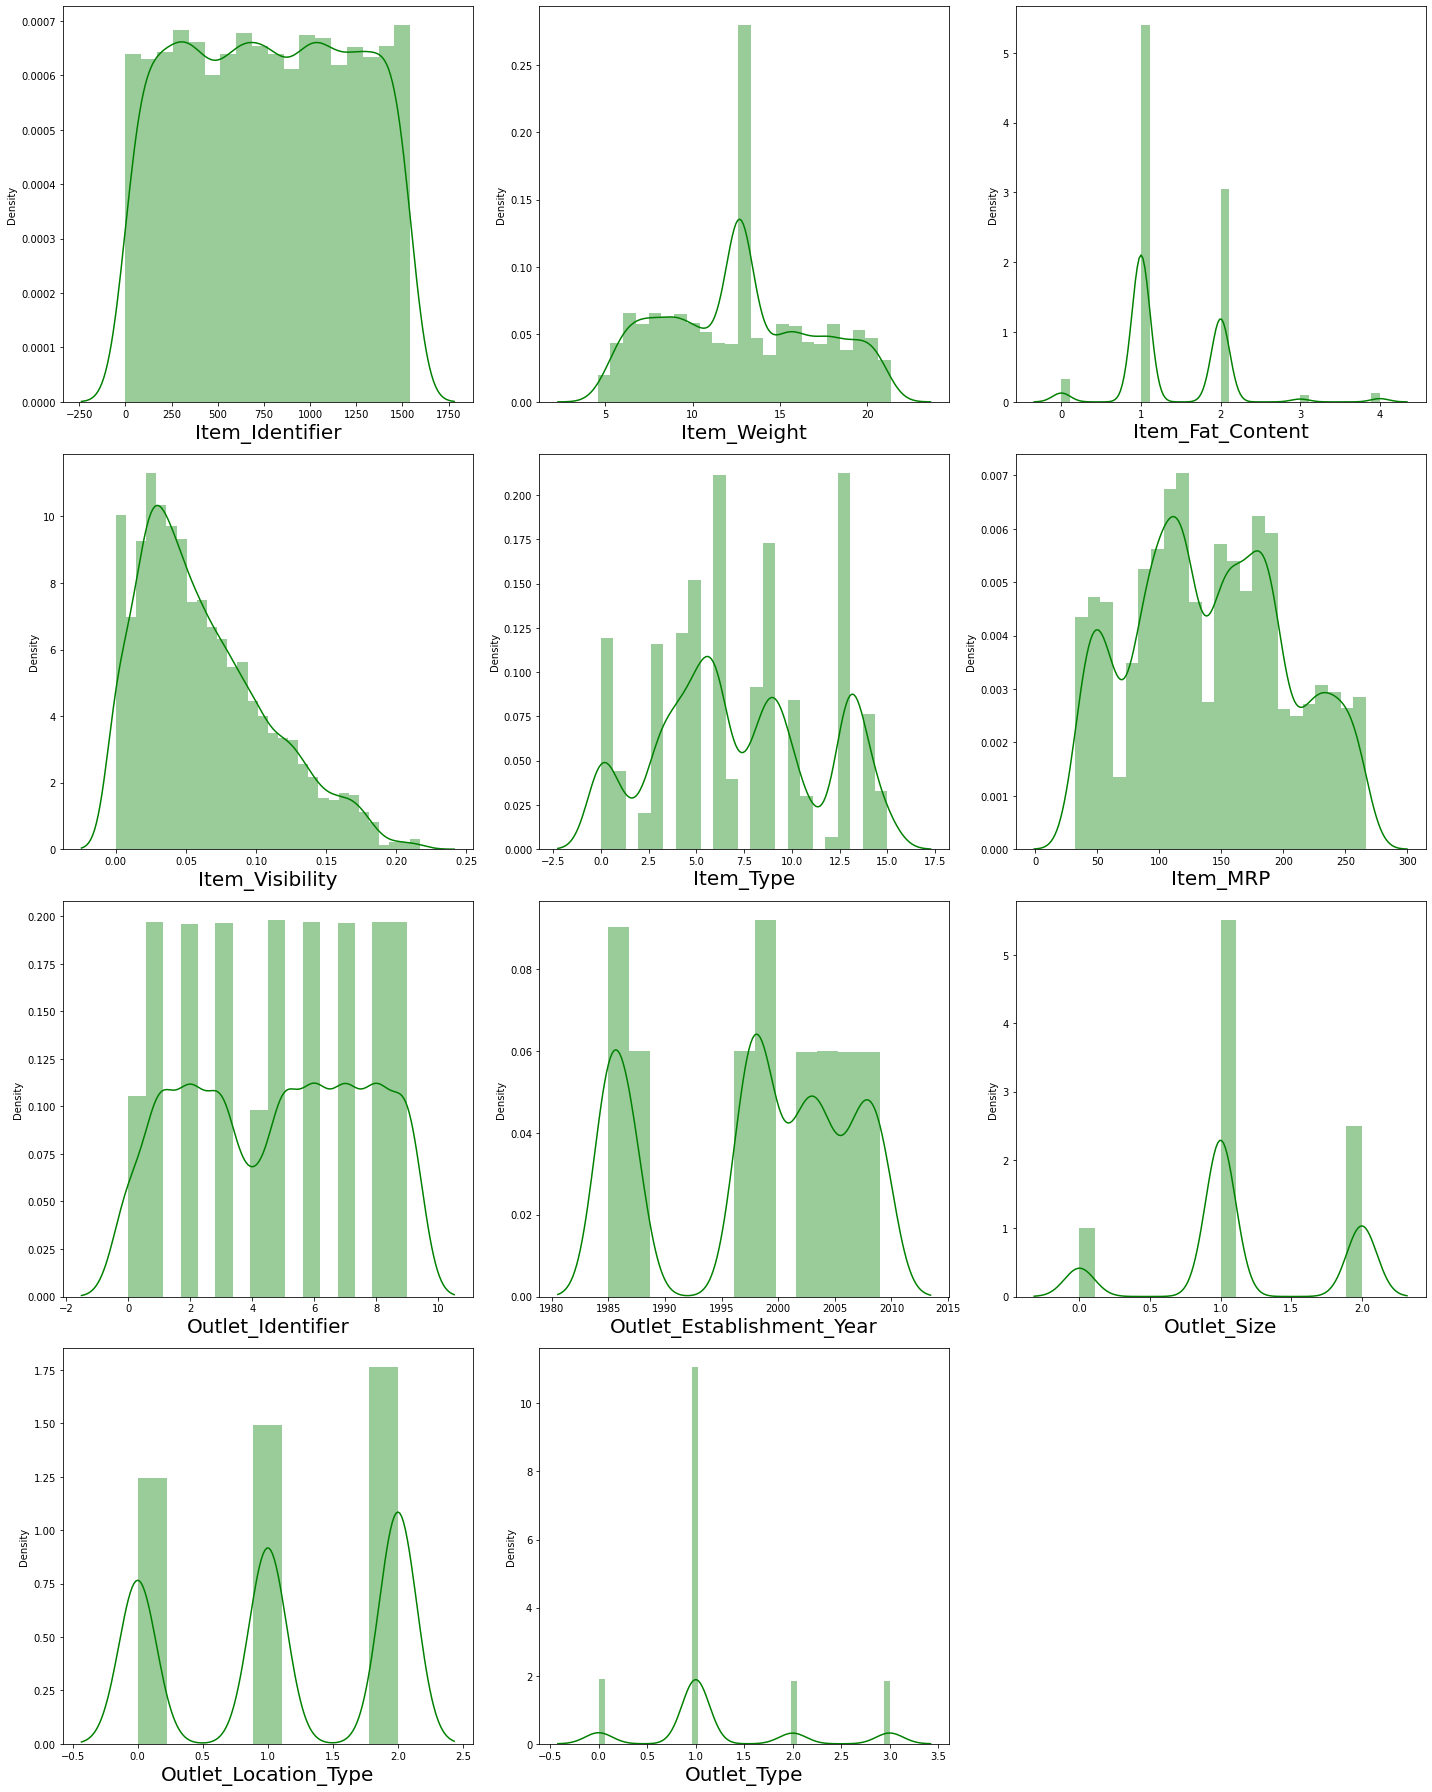

In [65]:
# let us now see the distribution of the dataset we have

plt.figure(figsize=(20,25), facecolor="white")
plotnumber = 1

for column in df_test:
    if plotnumber <=11:
        ax = plt.subplot(4,3, plotnumber)
        sns.distplot(df_test[column], color="green")
        plt.xlabel(column, fontsize=20)
    plotnumber+=1
plt.tight_layout()

## Correlation of the features with the dependent variable "Item_Outlet_Sales"

#### We can see columns "Item_MRP" and "Item_Visibility" have skewed data

In [66]:
corr_matrix = df_train.corr()
corr_matrix["Item_Outlet_Sales"].sort_values(ascending=False)

Item_Outlet_Sales            1.000000
Item_MRP                     0.573491
Outlet_Type                  0.390817
Outlet_Identifier            0.153668
Outlet_Location_Type         0.087474
Item_Type                    0.017142
Item_Weight                  0.010575
Item_Fat_Content             0.010389
Item_Identifier              0.002034
Outlet_Establishment_Year   -0.060149
Outlet_Size                 -0.079486
Item_Visibility             -0.090907
Name: Item_Outlet_Sales, dtype: float64

## Lets us now examine correlation using a "heatmap" for further clarification


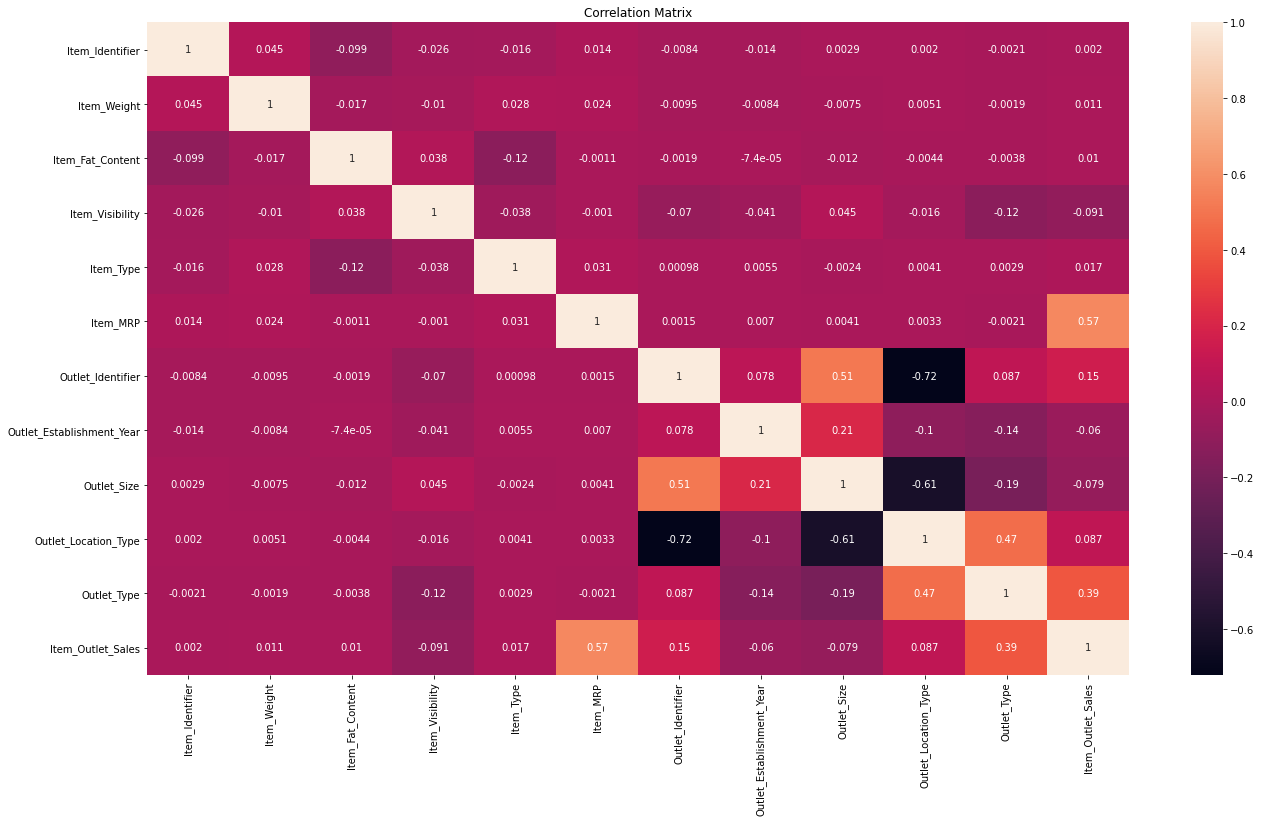

In [67]:
plt.figure(figsize=(22,12))
sns.heatmap(corr_matrix, annot=True)
plt.title("Correlation Matrix")
plt.show()

# Splitting up of dataset between x (features) and y (target column)

In [70]:
# train dataset with featurs only
x = df_train.drop(columns = ["Item_Outlet_Sales"], axis=1)

y = df_train["Item_Outlet_Sales"]

# test dataset with featurs only
x1 = df_test

### Check for skewness of data

#### The data appears to be skewed

#### Columns "Item_Visibility" and "Item_MRP" have skewness as they are continous datan for both "Train" and "Test" dataset after splitting

#### Let's now proceed to further remove/ reduce the skewness for better results

In [71]:
x.skew()

Item_Identifier             -0.008502
Item_Weight                  0.089907
Item_Fat_Content             1.010133
Item_Visibility              0.795956
Item_Type                    0.100953
Item_MRP                     0.128945
Outlet_Identifier           -0.067357
Outlet_Establishment_Year   -0.409186
Outlet_Size                 -0.082879
Outlet_Location_Type        -0.213304
Outlet_Type                  0.947057
dtype: float64

In [72]:
x1.skew()

Item_Identifier             -0.001969
Item_Weight                  0.140901
Item_Fat_Content             0.996518
Item_Visibility              0.787861
Item_Type                    0.091394
Item_MRP                     0.133061
Outlet_Identifier           -0.069734
Outlet_Establishment_Year   -0.411451
Outlet_Size                 -0.082542
Outlet_Location_Type        -0.212992
Outlet_Type                  0.953152
dtype: float64

### Storing the list of features having skewness in a variable "features". It's would be easier to pass it through at one go

In [73]:
features = ['Item_Visibility', 'Item_MRP']

# Lets us now Scale the data for further processing.¶

#### we have used StandardScaler for further scaling up of data 

In [74]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

x_scaled1 = scaler.fit_transform(x1)

## Power Transformer (yeo-Johnson)

### To reduce the skewness to some extent, I have used a Power Transformer technique 
### Since we have both positive and negative values in skewness, I have used "Yeo-Johnson" technique

In [75]:
from sklearn.preprocessing import PowerTransformer

scaler = PowerTransformer(method="yeo-johnson")

# transform "train" data
x[features] = scaler.fit_transform(x[features].values) 

# transform "test" data
x1[features] = scaler.fit_transform(x1[features].values) 


## Check the skewness of the feature dataset

### The skewness seems to have reduced considerably (excluding the categorical features)

In [76]:
x.skew()

Item_Identifier             -0.008502
Item_Weight                  0.089907
Item_Fat_Content             1.010133
Item_Visibility              0.115444
Item_Type                    0.100953
Item_MRP                    -0.114976
Outlet_Identifier           -0.067357
Outlet_Establishment_Year   -0.409186
Outlet_Size                 -0.082879
Outlet_Location_Type        -0.213304
Outlet_Type                  0.947057
dtype: float64

In [77]:
x1.skew()

Item_Identifier             -0.001969
Item_Weight                  0.140901
Item_Fat_Content             0.996518
Item_Visibility              0.105676
Item_Type                    0.091394
Item_MRP                    -0.111505
Outlet_Identifier           -0.069734
Outlet_Establishment_Year   -0.411451
Outlet_Size                 -0.082542
Outlet_Location_Type        -0.212992
Outlet_Type                  0.953152
dtype: float64

# split the dataset into train and test data set

In [78]:

x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.30, random_state = 200)


# Create multi output regression models



### 1) DecisionTreeRegressor

In [79]:
from sklearn.tree import DecisionTreeRegressor

dt_reg = DecisionTreeRegressor()
dt_reg.fit(x_train,y_train)

y_pred = dt_reg.predict(x_test)

print("Adjusted R2 squared : ",dt_reg.score(x_train,y_train))
print("Mean Absolute Error (MAE): ", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error (MSE): ",mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error (RMSE): ",np.sqrt(mean_squared_error(y_test, y_pred)))

Adjusted R2 squared :  1.0
Mean Absolute Error (MAE):  1088.4497873467774
Mean Squared Error (MSE):  2419740.3940279232
Root Mean Squared Error (RMSE):  1555.5514758528318


### 2) RandomForestRegressor

In [80]:
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor()
rf_reg.fit(x_train,y_train)

y_pred = rf_reg.predict(x_test)

print("Adjusted R2 squared : ",rf_reg.score(x_train,y_train))
print("Mean Absolute Error (MAE): ", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error (MSE): ",mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error (RMSE): ",np.sqrt(mean_squared_error(y_test, y_pred)))

Adjusted R2 squared :  0.9368726050410898
Mean Absolute Error (MAE):  805.4983718782127
Mean Squared Error (MSE):  1295734.0919974789
Root Mean Squared Error (RMSE):  1138.3031634839108


### 3) ExtraTreesRegressor

In [83]:
from sklearn.ensemble import ExtraTreesRegressor

extra_reg = ExtraTreesRegressor()
extra_reg.fit(x_train,y_train)

y_pred = extra_reg.predict(x_test)

print("Adjusted R2 squared : ",extra_reg.score(x_train,y_train))
print("Mean Absolute Error (MAE): ", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error (MSE): ",mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error (RMSE): ",np.sqrt(mean_squared_error(y_test, y_pred)))

Adjusted R2 squared :  1.0
Mean Absolute Error (MAE):  821.6052085551602
Mean Squared Error (MSE):  1332811.2091146451
Root Mean Squared Error (RMSE):  1154.4744298227852


### 4) KNeighborsRegressor

In [84]:
from sklearn.neighbors import KNeighborsRegressor

k_neigh = KNeighborsRegressor()
k_neigh.fit(x_train,y_train)

y_pred = k_neigh.predict(x_test)

print("Adjusted R2 squared : ",k_neigh.score(x_train,y_train))
print("Mean Absolute Error (MAE): ", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error (MSE): ",mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error (RMSE): ",np.sqrt(mean_squared_error(y_test, y_pred)))

Adjusted R2 squared :  0.6695187970282975
Mean Absolute Error (MAE):  853.9433383313564
Mean Squared Error (MSE):  1434880.9902959648
Root Mean Squared Error (RMSE):  1197.8651803504285


### 5) HistGradientBoostingRegressor

In [85]:
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor

hist_grad = HistGradientBoostingRegressor()
hist_grad.fit(x_train,y_train)

y_pred = hist_grad.predict(x_test)

print("Adjusted R2 squared : ",hist_grad.score(x_train,y_train))
print("Mean Absolute Error (MAE): ", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error (MSE): ",mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error (RMSE): ",np.sqrt(mean_squared_error(y_test, y_pred)))

Adjusted R2 squared :  0.7475298699249053
Mean Absolute Error (MAE):  792.935867960072
Mean Squared Error (MSE):  1246927.2942761006
Root Mean Squared Error (RMSE):  1116.6589874604067


# Cross validation to check if its overfitting

In [89]:
from sklearn.model_selection import cross_val_score

In [90]:
scr = cross_val_score(dt_reg, x, y, cv=5)
print("Cross Validation score of DecisionTreeRegressor model is:", scr.mean())

Cross Validation score of DecisionTreeRegressor model is: 0.14355428586542165


In [91]:
scr = cross_val_score(rf_reg, x, y, cv=5)
print("Cross Validation score of RandomForestRegressor model is:", scr.mean())

Cross Validation score of RandomForestRegressor model is: 0.5443623552100892


In [94]:
scr = cross_val_score(extra_reg, x, y, cv=5)
print("Cross Validation score of ExtraTreesRegressor model is:", scr.mean())

Cross Validation score of ExtraTreesRegressor model is: 0.5346334265449333


In [95]:
scr = cross_val_score(k_neigh, x, y, cv=5)
print("Cross Validation score of KNeighborsRegressor model is:", scr.mean())

Cross Validation score of KNeighborsRegressor model is: 0.017363573408932798


In [96]:
scr = cross_val_score(hist_grad, x, y, cv=5)
print("Cross Validation score of HistGradientBoostingRegressor model is:", scr.mean())

Cross Validation score of HistGradientBoostingRegressor model is: 0.5644782728099018


# Selecting the best ML model for this dataset

#### From the below, it appears HistGradientBoostingRegressor is the appropriate algorithm for this scenario


| Models used | Adjusted R2 score | CV score| Difference output |
| --- | --- | --- |---|
| DecisionTreeRegressor | 100 | 0.143554285865421 | 99.8564457141346 |
| RandomForestRegressor | 0.936872605041089 | 0.544362355210089 | 0.392510249831 |
| ExtraTreesRegressor | 100 | 0.534633426544933 | 99.4653665734551 |
| KNeighborsRegressor | 0.669518797028297 | 0.0173635734089327 | 0.652155223619364 |
| HistGradientBoostingRegressor | 0.747529869924905 | 0.564478272809901 | 0.183051597115004 |


# Hyper Parameter Tuning
### Let us try to tune the proposed model (HistGradientBoostingRegressor) to improve the outcome
#### The "paramaters" have been selected from the skicit library and I have considered 6 paramaters


In [101]:
parameters = {"loss":["least_squares", "least_absolute_deviation", "poisson"],
              "max_iter": [100,150,200],
              "max_bins": [4,8,9],
              "max_leaf_nodes":[2,3,4],
              "learning_rate":[0.1,0.2,0.3],
              "validation_fraction":[0.1,0.2,0.3]
             }

### GridSearchCV is used to tune the parameters by fitting the same to the training dataset

In [102]:
from sklearn.model_selection import GridSearchCV

GCV = GridSearchCV(HistGradientBoostingRegressor(), parameters, cv=5)

In [103]:
GCV.fit(x_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=HistGradientBoostingRegressor(l2_regularization=0.0,
                                                     learning_rate=0.1,
                                                     loss='least_squares',
                                                     max_bins=255,
                                                     max_depth=None,
                                                     max_iter=100,
                                                     max_leaf_nodes=31,
                                                     min_samples_leaf=20,
                                                     n_iter_no_change=None,
                                                     random_state=None,
                                                     scoring=None, tol=1e-07,
                                                     validation_fraction=0.1,
                                                     verbose=0,
                        

In [104]:
GCV.best_params_

{'learning_rate': 0.1,
 'loss': 'least_squares',
 'max_bins': 9,
 'max_iter': 100,
 'max_leaf_nodes': 3,
 'validation_fraction': 0.1}

### Rebuild the model using the appropriate params we recieved from best_params_

In [110]:
mod_bigmart = HistGradientBoostingRegressor(learning_rate= 0.1, loss= "least_squares", max_bins= 9, 
                                            max_iter= 100, max_leaf_nodes= 3, validation_fraction= 0.1)

mod_bigmart.fit(x_train,y_train)
pred = mod_bigmart.predict(x_test)
pred

array([5535.38636208,  733.80171384, 2313.87190251, ..., 2622.3605228 ,
       1167.36105607, 1188.92736485])

# Saving the model (using joblib)

In [106]:
import joblib
joblib.dump(mod_bigmart,"BigMart_Dataset.pkl")

['BigMart_Dataset.pkl']

# Loading the saved model

In [107]:
model = joblib.load("BigMart_Dataset.pkl")

prediction = model.predict(x_test)

prediction=pd.DataFrame(prediction)
prediction

,0
0,5535.386362
1,733.801714
2,2313.871903
3,2714.897945
4,471.812715
...,...
2524,1574.311458
2525,733.801714
2526,2622.360523
2527,1167.361056
